---
title: "Intro to DSGE Model & Julia Basics"
subtitle: "Business Cycles and Fluctuations - AE2E6"
---

::: {.callout-note collapse="true" title="Objectives"}


- Introduce Julia environment
    - run cells
    - basic types: numbers, strings, vectors, matrices
    - functions
    - simple plots
- Simulate AR1 models
    - impulse response functions
    - stochastic simulations
        - conditional / unconditional moments
    - develop intuition about eigenvalues / ergodic distributions
- Learn the Dyno mini-interface
    - check the steady-state
    - understand the meaning of shocks (exogenous variables, innovations)
    - understand the outputs (decision rule, simulation, graphs)
    - interpret IRFs (persistence, magnitude, ...)

:::    

# Julia Basics

::: {.content-visible when-profile="correction"}

This should contain only the correction.

:::

# Manipulating AR1 Models

We consider here a simple autoregressive model:

$$y_t = A y_{t-1} + B e_t$$

where $y_t=(y^1_t, y^2_t)$ a vector of variables and  $e_t=(e^1_t, e^2_t)$ a normal i.i.d. multivariate process defined by covariance matrix $\Sigma \in R^p \times R^p$.



We start by choosing: 

$$A = \begin{bmatrix}\rho & 0 \\ 2 & \lambda\end{bmatrix}$$

$$B = \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$$

$$\Sigma = \begin{bmatrix}0.05 & 0.005 \\ 0.005 & 0.01\end{bmatrix}$$

__Define julia variables for matrices $A, B, \Sigma$.__


In [1]:
ρ = 0.3
λ = 0.5
A = [ρ 2; 0 λ]

2×2 Matrix{Float64}:
 0.3  2.0
 0.0  0.5

In [2]:
# B is the identity matrix
B = [1.0 0.0; 0.0 1.0] # pay attention to use floats rather than integers

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [3]:
# a more julian way of using the identity matrix
using LinearAlgebra: I
B = I
# the resulting object adapts to any size (no need to instantiate it)

LinearAlgebra.UniformScaling{Bool}
true*I

In [4]:
Σ = [0.05 0.005; 0.005 0.01]

2×2 Matrix{Float64}:
 0.05   0.005
 0.005  0.01

__Compute (programmatically) the eigenvalues of A.__


In [5]:
using LinearAlgebra
eigvals(A)
# no surprise: these are equal to λ, ρ

2-element Vector{Float64}:
 0.3
 0.5

In [6]:
A*[0,1]

2-element Vector{Float64}:
 2.0
 0.5

__Simulate the response to a one deviation shock to $e^1_t$ and $e^2_t$ over 10 periods.__

In [7]:
# an easy to read / inefficient solution

# pay attention that diagonal terms in Σ contain the variance...

e0_1 = [sqrt(Σ[1,1]), 0.0]
e0_2 = [0.0, sqrt(Σ[2,2])]

sim_y_1 = hcat([A^n*e0_1 for n in 0:10]...)
sim_y_2 = hcat([ A^n*e0_2 for n in 0:10 ]...)

2×11 Matrix{Float64}:
 0.0  0.2   0.16   0.098   0.0544   0.02882   …  0.00193344   0.000970658
 0.1  0.05  0.025  0.0125  0.00625  0.003125     0.000195313  9.76563e-5

__Plot the result__

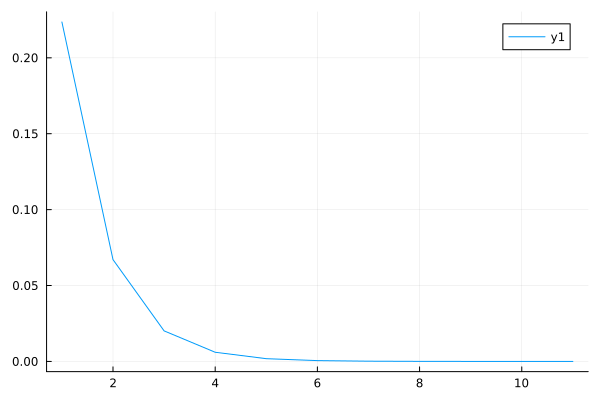

In [8]:
using Plots

plot(sim_y_1[1,:])

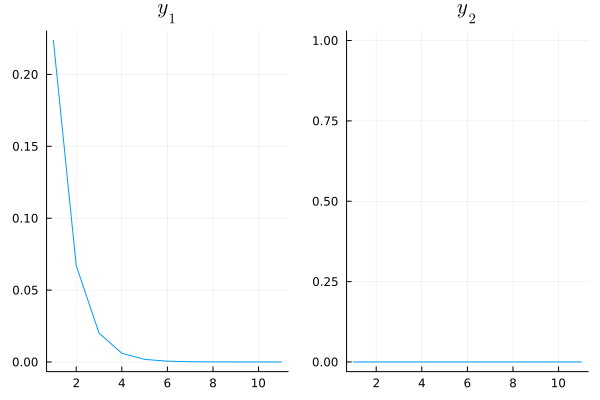

In [9]:
# we can make to plots size by size
plot( plot(sim_y_1[1,:], title="\$y_1\$", legend=false), plot(sim_y_1[2,:], title="\$y_2\$", legend=false))

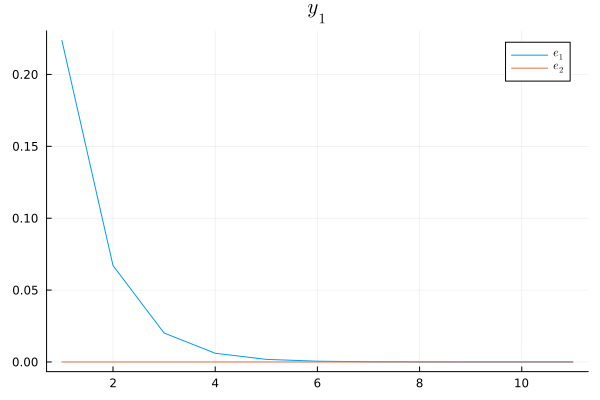

In [10]:
# or maake two plots on the same graph:
pl = plot(  sim_y_1[1,:], label="\$e_1\$", title="\$y_1\$" )
plot!(pl,sim_y_1[2,:], label="\$e_2\$")

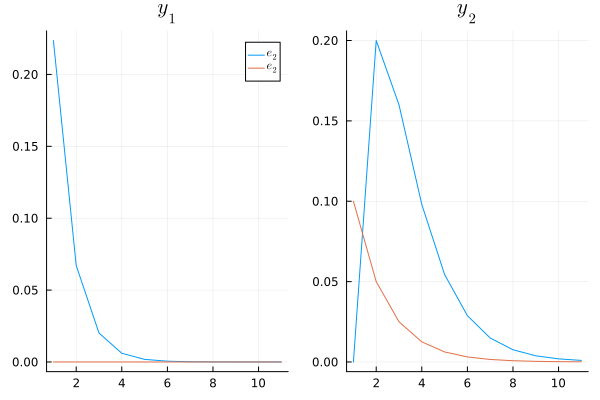

In [11]:
# Let's combine everything

pl1 = plot(  sim_y_1[1,:], label="\$e_2\$", title="\$y_1\$" )
plot!(pl1,sim_y_1[2,:], label="\$e_2\$")
pl2 = plot(  sim_y_2[1,:], label="\$e_2\$", title="\$y_2\$" )
plot!(pl2,sim_y_2[2,:], label="\$e_2\$", legend=false)
plot(pl1, pl2)

Remarks: we see that the response to the second shock is not monotonous (in the first two periods, $y_2$ increases). This is a result of the fact that
$|||A||| > \rho(A)$

__What do you get if one eigenvalue is equal to 1? Greater than 1?__

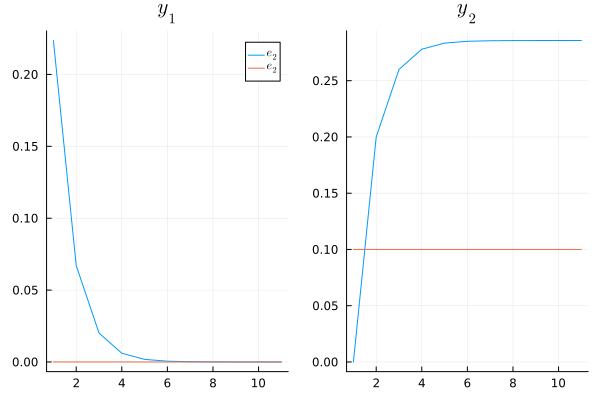

In [12]:
# unit root case
ρ = 0.3
λ = 1.0

A = [ρ 2; 0 λ]

e0_1 = [sqrt(Σ[1,1]), 0.0]
e0_2 = [0.0, sqrt(Σ[2,2])]

sim_y_1 = hcat([A^n*e0_1 for n in 0:10]...)
sim_y_2 = hcat([ A^n*e0_2 for n in 0:10 ]...)
pl1 = plot(  sim_y_1[1,:], label="\$e_2\$", title="\$y_1\$" )
plot!(pl1,sim_y_1[2,:], label="\$e_2\$")
pl2 = plot(  sim_y_2[1,:], label="\$e_2\$", title="\$y_2\$" )
plot!(pl2,sim_y_2[2,:], label="\$e_2\$", legend=false)
plot(pl1, pl2)

We see that both shocks have a persistent effect on variable $y_2$ which is associated to the unit root.
The new steady-state is not the original one.

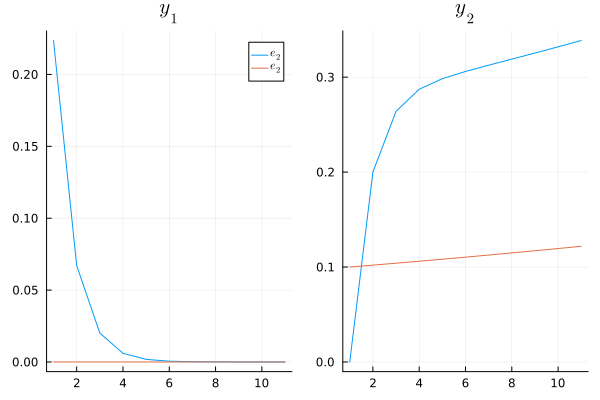

In [13]:
# explosive case
ρ = 0.3
λ = 1.02

A = [ρ 2; 0 λ]

e0_1 = [sqrt(Σ[1,1]), 0.0]
e0_2 = [0.0, sqrt(Σ[2,2])]

sim_y_1 = hcat([A^n*e0_1 for n in 0:10]...)
sim_y_2 = hcat([ A^n*e0_2 for n in 0:10 ]...)
pl1 = plot(  sim_y_1[1,:], label="\$e_2\$", title="\$y_1\$" )
plot!(pl1,sim_y_1[2,:], label="\$e_2\$")
pl2 = plot(  sim_y_2[1,:], label="\$e_2\$", title="\$y_2\$" )
plot!(pl2,sim_y_2[2,:], label="\$e_2\$", legend=false)
plot(pl1, pl2)

Now one of the variable diverges.
Note that $y_1$ does not diverge because of the specific initial shock (colinear to [1,0]). 

__Import the Distributions package. Use `MvNormal` to compute draws from a multivariate distribution with covariance matrix $\Sigma$__

In [14]:
# we need the distributions package to compute mvnormal
import Pkg; Pkg.add("Distributions")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [15]:
using Distributions

# MvNormal
# check the doc

In [16]:
dis = MvNormal(Σ)
rand(dis)

2-element Vector{Float64}:
 -0.0092117751370767
  0.05543088198157054

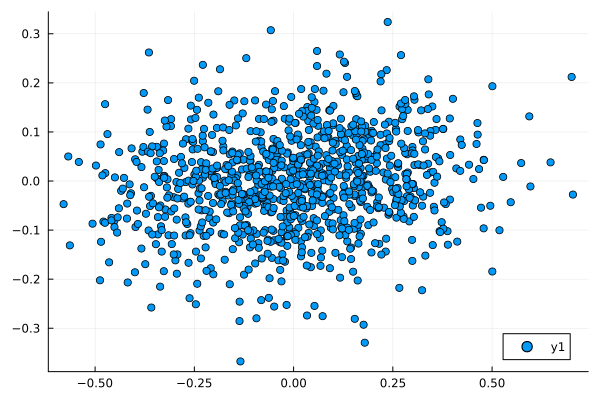

In [17]:
# we can plot the distribution of $\epsilon$
random_points = [rand(dis) for i=1:1000]
pl = scatter([e[1] for e in random_points], [e[2] for e in random_points])


In [18]:
# even better, with the StatsPlots Library
import Pkg; Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


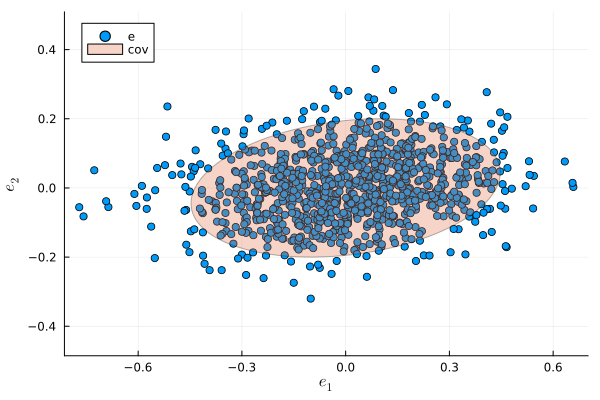

In [19]:
using StatsPlots
random_points = [rand(dis) for i=1:1000]
pl = scatter([e[1] for e in random_points], [e[2] for e in random_points], label="e", xlabel="\$e_1\$", ylabel="\$e_2\$")
covellipse!([0,0], Σ, n_std=2, aspect_ratio=1, label="cov")

__Perform a stochastic simulation over 20 periods starting with a one standard-deviation in $e_2$.__

In [20]:
# return to old value of A
ρ = 0.3
λ = 0.5

A = [ρ 2; 0 λ]

2×2 Matrix{Float64}:
 0.3  2.0
 0.0  0.5

In [22]:
function simulate(A,B,Σ,e0=zeros(2); T=20)
    
    # initialize distribution object
    dis = MvNormal(Σ)
    
    # create vector to hold the simulation
    sim = [B*e0]

    for t=1:T

        e1 = rand(dis)

        y0 = sim[end] # last value
        y1 = A*y0 + B*e1

        push!(sim, y1)


    end

    return hcat(sim...)
end

simulate (generic function with 2 methods)

In [23]:
sim = simulate(A,B,Σ,e0_2)

2×21 Matrix{Float64}:
 0.0  0.383824   0.626772  0.732189   …  -0.106101   -0.078142   0.228395
 0.1  0.0946109  0.217955  0.0983513      0.0221334  -0.0364673  0.159186

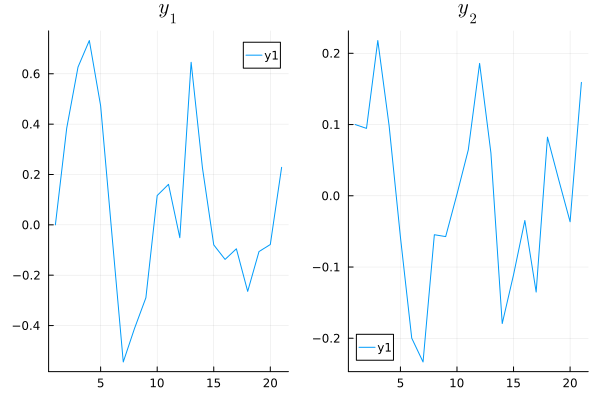

In [24]:
plot(
    plot(sim[1,:], title="\$y_1\$" ),
    plot(sim[2,:], title="\$y_2\$" )
)

Much harder to intepret results from a single simulation...

__Perform K=500 stochastic simulations over 20 periods starting with a one standard-deviation in $e_2$. Plot the result.__

In [25]:
K = 500
sims = [simulate(A,B,Σ,e0_2) for n=1:K] 

500-element Vector{Matrix{Float64}}:
 [0.0 0.18832890636009295 … -0.017999865930345443 0.03728589398650098; 0.1 0.08389254675662727 … -0.11003954439913584 -0.11904152242351801]
 [0.0 0.08490622450845196 … 0.2457927124239998 0.2859533859663689; 0.1 0.02524966170390399 … 0.33269370974090795 0.12996977701471768]
 [0.0 0.027680416436487665 … -0.24024186020927968 -0.17129931403163579; 0.1 -0.04324849507462496 … 0.029101297751528747 -0.11042963938560836]
 [0.0 0.14775078756774843 … 0.19064927338869153 0.08245020046350915; 0.1 0.2809285814813226 … 0.08691006686036631 0.07424599709564336]
 [0.0 0.15568999080118356 … 0.06025128523552638 0.07404394232941035; 0.1 -0.18799797601348256 … -0.03913422810044808 0.024966528885025253]
 [0.0 0.2698192409396105 … 0.4573758149332507 -0.43092702943018224; 0.1 0.016438338416651065 … -0.14286603787088675 -0.18995475785280988]
 [0.0 0.20739678362574068 … 0.2664692207183707 0.3932900624627641; 0.1 0.045246365820459315 … 0.11487185651560936 0.08427921228006971]


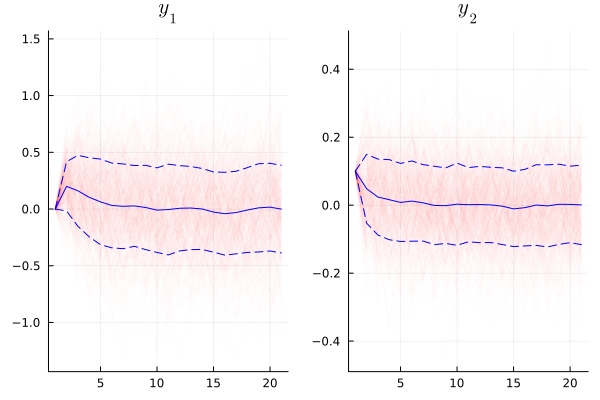

In [26]:
pl1 = plot()
for sim in sims
    plot!(pl1, sim[1,:], title="\$y_1\$", legend=false, color="red", alpha=0.01)
end

# add average
average_1 = [ mean( [sim[1,t] for sim in sims] ) for t=1:size(sims[1],2)]
std_1 = [ std( [sim[1,t] for sim in sims] ) for t=1:size(sims[1],2)]

plot!(pl1, average_1, color="blue")
plot!(pl1, average_1-std_1, color="blue", linestyle=:dash)
plot!(pl1, average_1+std_1, color="blue", linestyle=:dash)

pl2 = plot()
for sim in sims
    plot!(pl2, sim[2,:], title="\$y_2\$", legend=false , color="red", alpha=0.01)
end

# add average
average_2 = [ mean( [sim[2,t] for sim in sims] ) for t=1:size(sims[1],2)]
std_2 = [ std( [sim[2,t] for sim in sims] ) for t=1:size(sims[1],2)]

plot!(pl2, average_2, color="blue")
plot!(pl2, average_2-std_2, color="blue", linestyle=:dash)

plot!(pl2, average_2+std_2, color="blue", linestyle=:dash)

plot(pl1, pl2)


We observe that:

1. the *expected* response is similar to the determinstic irf we computed before
2. volatility makes predictions hard..
3. it looks like the unconditional volatility converges after a few periods

__Ergodic Distribution.__

It can be shown that the ergodic distribution is a multivariate normal law, with covariance matrix $\Omega$.

This matrix is a solution to the equation $\Omega = A \Omega A' + B \Sigma B'$.

A simple algorithm to find it consist in applying the recurrence $\Omega = A \Omega A' + B \Sigma B'$ until convergence, starting with $\Omega_0 =0$.

Implement this algorithm.

In [27]:
function ergodic_steady_state(A,B,Σ; N=1000, tol_η=1e-8)
    Ω0 = Σ*0
    for n = 1:N
        Ω = A*Ω0*A'+B*Σ*B'
        η = maximum( abs.( Ω - Ω0) )
        if η<tol_η
            return Ω
        end
        Ω0 = Ω
    end
    error("No convergence")
end


ergodic_steady_state (generic function with 1 method)

__Compare the result with the empirical ergodic distribution obtained from the simulations__

In [36]:
random_final_points = [sim[:,end] for sim in sims]

500-element Vector{Vector{Float64}}:
 [0.03728589398650098, -0.11904152242351801]
 [0.2859533859663689, 0.12996977701471768]
 [-0.17129931403163579, -0.11042963938560836]
 [0.08245020046350915, 0.07424599709564336]
 [0.07404394232941035, 0.024966528885025253]
 [-0.43092702943018224, -0.18995475785280988]
 [0.3932900624627641, 0.08427921228006971]
 [-0.3236432711020681, -0.08661942646931664]
 [0.3155250124066983, 0.10693570168447386]
 [0.9053497462786426, -0.01510204327522291]
 ⋮
 [-0.1145732409117616, -0.008600676917679153]
 [0.1400529116331458, -0.035141662664799414]
 [0.16256117113963653, -0.11772740093913514]
 [-0.3338856772682105, 0.08802295261086351]
 [0.38535552448728594, 0.06008918288191334]
 [0.02760517950605216, -0.1483170103344951]
 [-0.2788785973054095, -0.0861741069858529]
 [-0.02038028228932437, 0.26605400051523426]
 [0.23107605487093494, 0.09125912967639]

In [28]:
Ω = ergodic_steady_state(A,B,Σ)

2×2 Matrix{Float64}:
 0.141995   0.0215686
 0.0215686  0.0133333

In [38]:
# empirical covariance
cov( random_final_points)
# very close to theoretical one

2×2 Matrix{Float64}:
 0.149297   0.0214633
 0.0214633  0.0136766

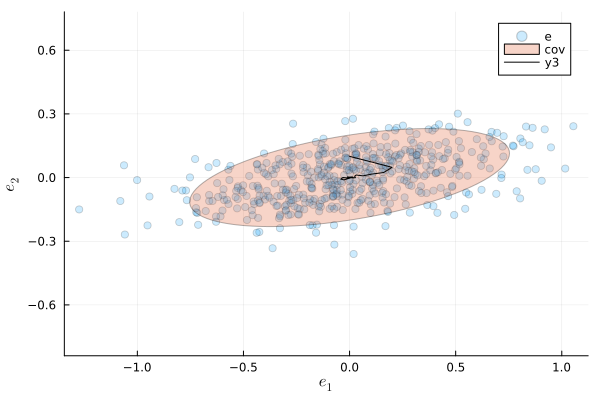

In [41]:

# graphical representation
using StatsPlots

pl = scatter([e[1] for e in random_final_points], [e[2] for e in random_final_points], label="e", xlabel="\$e_1\$", ylabel="\$e_2\$", alpha=0.2)
covellipse!([0,0], Ω, n_std=2, aspect_ratio=1, label="cov")
# let's add the expected path
plot!(pl, average_1, average_2, color="black")

# Using Dyno



__Open the neoclassical model first.__

In [10]:
H__ow is the steady-state coded
- 

ErrorException: syntax: extra token "the" after end of expression

__Bonus: copy the solution to the model from the web interface. Compute impulse response functions and compare to the model.__

In [ ]:
# Copy the values for:

# A
# B
# Σ